# Data Cleaning

This notebook aims to perform data cleaning after text preprocessing is done.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.text import Tokenizer
import seaborn as sns

In [3]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/suicidal-text-detection")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [4]:
# Load dataset
cleaned_df = pd.read_csv('Data/suicide_detection_full_cleaned.csv') 
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


# Remove irrelevant words

In [7]:
# Obtain word frequency 
tokenizer = Tokenizer()
cleaned_df = cleaned_df.dropna(subset=['cleaned_text'])
tokenizer.fit_on_texts(cleaned_df['cleaned_text'])
word_freq = pd.DataFrame(tokenizer.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)

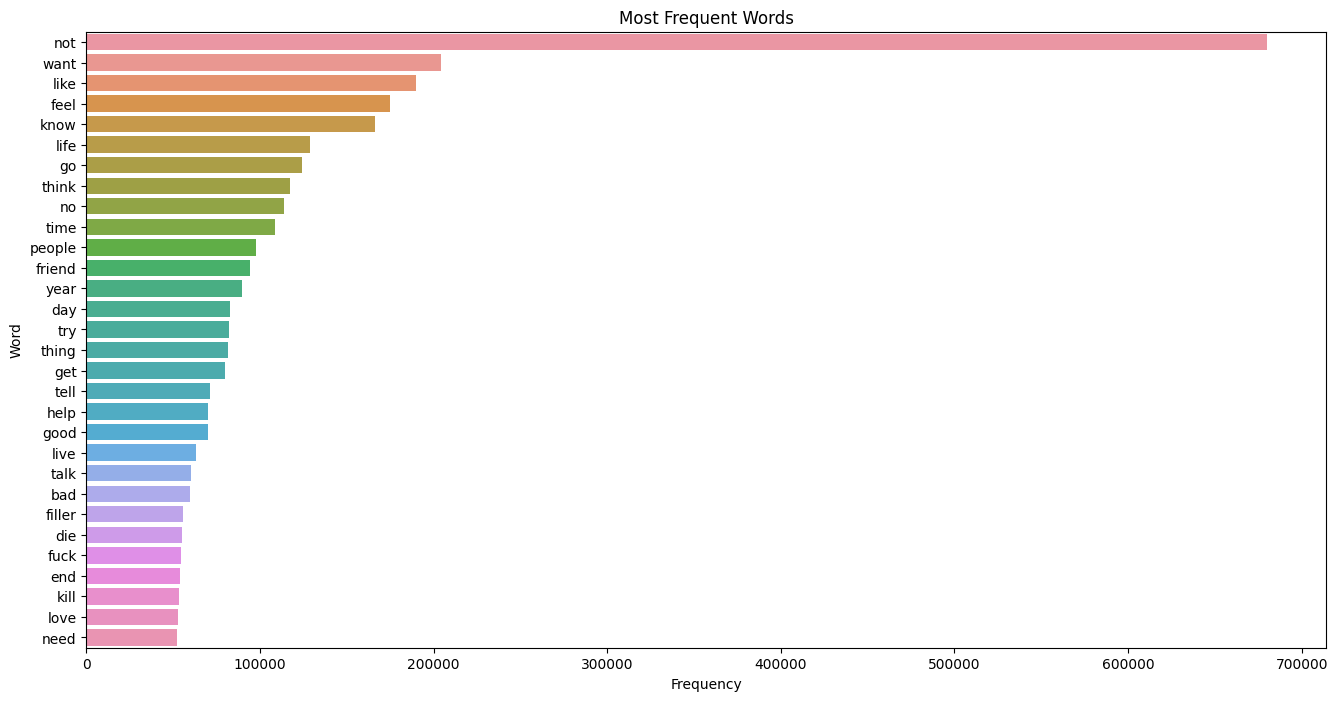

In [8]:
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq.iloc[:30])
plt.title('Most Frequent Words')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [9]:
# Removed anomalous "filler" word 
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].str.replace('filler', '')

# Remove rows that do not contain any words

In [10]:
# Remove rows with text length 0
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())!=0)]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


# Remove outliers in word count of texts

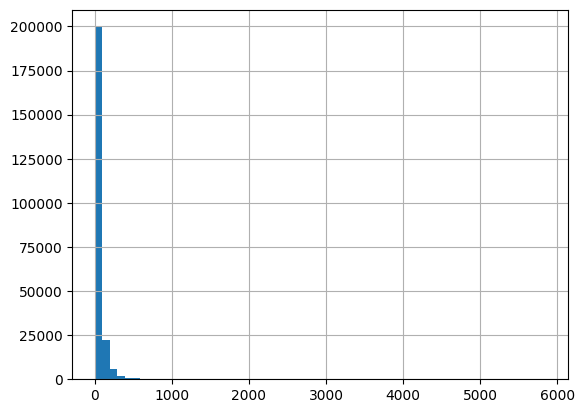

count    231917.000000
mean         51.737527
std          85.469268
min           1.000000
25%          11.000000
50%          24.000000
75%          61.000000
max        5850.000000
dtype: float64


In [11]:
# Get word count of posts 
posts_len = [len(x.split()) for x in cleaned_df['cleaned_text']]
pd.Series(posts_len).hist(bins=60)
plt.show()
print(pd.Series(posts_len).describe())

In [12]:
# Subset dataset to obtain rows with less than or equal to 62 words
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())<=62)]
cleaned_df.reset_index(drop=True, inplace=True)

In [13]:
# Check dataset 
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


In [15]:
# Export cleaned dataset 
cleaned_df.to_csv('/content/drive/MyDrive/suicidal-text-detection/Data/suicide_detection_final_cleaned.csv', index=False)